In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
ss=pd.read_csv('/content/drive/MyDrive/zindi/icompass/SampleSubmission.csv')
test=pd.read_csv('/content/drive/MyDrive/zindi/icompass/Test.csv')
train=pd.read_csv('/content/drive/MyDrive/zindi/icompass/Train.csv')

In [ ]:
## MANDATORY 
## [IMPORT NECESSARY LIBRARIES]

import gensim
import nltk
import sklearn

import numpy as np
import matplotlib

import re
import codecs
import itertools
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

print ('DONE [IMPORT NECESSARY LIBRARIES]')

DONE [IMPORT NECESSARY LIBRARIES]


In [ ]:
## MANDATORY 
## [PREPROCESS] Text Cleaning

def standardize_text(df, text_field):
    # normalize by turning all letters into lowercase
    df[text_field] = df[text_field].str.lower()
    # get rid of URLS
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"http\S+", "", elem))  
    return df

# call the text cleaning function
train = standardize_text(train, "text")

print ('DONE - [PREPROCESS] Text Cleaning')

DONE - [PREPROCESS] Text Cleaning


In [ ]:
train.head()

,ID,text,label
0,13P0QT0,3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...,-1
1,SKCLXCJ,cha3eb fey9elkoum menghir ta7ayoul ou kressi,-1
2,V1TVXIJ,bereau degage nathef ya slim walahi ya7chiw fi...,-1
3,U0TTYY8,ak slouma,1
4,68DX797,entom titmanou lina a7na 3iid moubarik a7na ch...,-1


In [ ]:
train.groupby("label").count()

,ID,text
label,,
-1,29295,29295
0,2466,2466
1,38239,38239


In [ ]:
## MANDATORY
## [PREPROCESS] Tokenize

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

train["tokens"] = train["text"].apply(tokenizer.tokenize)
train.head()

,ID,text,label,tokens
0,13P0QT0,3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...,-1,"[3sbaaaaaaaaaaaaaaaaaaaa, lek, ou, le, seim, r..."
1,SKCLXCJ,cha3eb fey9elkoum menghir ta7ayoul ou kressi,-1,"[cha3eb, fey9elkoum, menghir, ta7ayoul, ou, kr..."
2,V1TVXIJ,bereau degage nathef ya slim walahi ya7chiw fi...,-1,"[bereau, degage, nathef, ya, slim, walahi, ya7..."
3,U0TTYY8,ak slouma,1,"[ak, slouma]"
4,68DX797,entom titmanou lina a7na 3iid moubarik a7na ch...,-1,"[entom, titmanou, lina, a7na, 3iid, moubarik, ..."


In [ ]:
train.drop(columns='ID')

,text,label,tokens
0,3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...,-1,"[3sbaaaaaaaaaaaaaaaaaaaa, lek, ou, le, seim, r..."
1,cha3eb fey9elkoum menghir ta7ayoul ou kressi,-1,"[cha3eb, fey9elkoum, menghir, ta7ayoul, ou, kr..."
2,bereau degage nathef ya slim walahi ya7chiw fi...,-1,"[bereau, degage, nathef, ya, slim, walahi, ya7..."
3,ak slouma,1,"[ak, slouma]"
4,entom titmanou lina a7na 3iid moubarik a7na ch...,-1,"[entom, titmanou, lina, a7na, 3iid, moubarik, ..."
...,...,...,...
69995,pff bayna beli kbira f wejhakk yakhiii rouhi r...,-1,"[pff, bayna, beli, kbira, f, wejhakk, yakhiii,..."
69996,aman lmara jeya zidou t3am9ou fel a7deeth akth...,-1,"[aman, lmara, jeya, zidou, t3am9ou, fel, a7dee..."
69997,winha nakhtabha hhhhh,-1,"[winha, nakhtabha, hhhhh]"
69998,fachel enta w houwa,-1,"[fachel, enta, w, houwa]"


In [ ]:
## [EDA] Explore words and sentences

all_words = [word for tokens in train["tokens"] for word in tokens]

sentence_lengths = [len(tokens) for tokens in train["tokens"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

688679 words total, with a vocabulary size of 144241


In [ ]:
# [EDA] Explore Vocabulary

# What are the words in the vocabulary
print (VOCAB[0:100])

# What are the most commonly occuring words
from collections import Counter
count_all_words = Counter(all_words)

# get the top 100 most common occuring words
count_all_words.most_common(100)

['0', '00', '000', '0000', '00000', '000000', '0000000', '00000000', '000000000', '00000000000', '000000000000', '00000000000000000', '0000000000000000000', '000000000000000000000', '000000000000000000000000000', '000000000000000000000000000000000', '0000000000000000000000000000000000000000000', '00000000000000000000000000000000000000000000000000000000000', '000001', '00001', '0001', '000dt', '000marra', '000obama', '001', '0021624085122', '0021697056148', '004725', '007', '009', '00m', '01', '02', '03', '04', '05', '05er', '05tou', '06', '0626718356', '06529205', '07', '0705', '08', '09', '0ff', '0malyon', '0mk', '0ui', '0vrmt', '0zéro0', '1', '10', '100', '1000', '10000', '100000', '1000000', '10000000', '100000000', '1000000000', '10000000000', '100000000000', '10000000000000', '100000000000000', '1000000000000000', '10000000000000000', '1000000000000000000', '100000000000000000000000000', '100000000000000000000000000000000000000', '1000000000000000000000000000000000000000', '100000

[('w', 19465),
 ('ya', 8962),
 ('fi', 8837),
 ('el', 7811),
 ('slim', 7103),
 ('rabi', 6479),
 ('si', 3631),
 ('ca', 3144),
 ('l', 3125),
 ('kol', 3093),
 ('bech', 2994),
 ('bravo', 2929),
 ('m3ak', 2749),
 ('ma', 2727),
 ('3la', 2712),
 ('ken', 2651),
 ('la', 2611),
 ('allah', 2523),
 ('slouma', 2252),
 ('men', 2160),
 ('il', 2148),
 ('ou', 2145),
 ('eli', 1951),
 ('a', 1866),
 ('le', 1808),
 ('rabbi', 1776),
 ('ama', 1715),
 ('b', 1627),
 ('barcha', 1554),
 ('et', 1546),
 ('enti', 1465),
 ('min', 1444),
 ('mabrouk', 1418),
 ('3ala', 1417),
 ('dima', 1413),
 ('ki', 1370),
 ('tounes', 1335),
 ('f', 1335),
 ('wa', 1322),
 ('fih', 1313),
 ('tawa', 1307),
 ('we', 1276),
 ('fil', 1269),
 ('elli', 1260),
 ('li', 1246),
 ('y', 1240),
 ('riahi', 1235),
 ('les', 1217),
 ('chay', 1180),
 ('mouch', 1174),
 ('de', 1157),
 ('ena', 1151),
 ('c', 1130),
 ('club', 1112),
 ('ti', 1097),
 ('brabi', 1090),
 ('3lik', 1082),
 ('3am', 1079),
 ('ana', 1079),
 ('m3a', 1066),
 ('ye', 1045),
 ('mala', 1033),
 

In [ ]:
## MANDATORY 
## [CLASSIFY] Train test Split

from sklearn.model_selection import train_test_split

list_corpus = train["text"]
list_labels = train["label"]

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)

print("Training set: %d samples" % len(X_train))
print("Test set: %d samples" % len(X_test))

Training set: 56000 samples
Test set: 14000 samples


In [ ]:
print (X_train[:10])

49080                a5er 5 zanatir yhbo lfri9i hhhhhhhhhh
67942    raïs el hana wrkad fijebbena balouut kbir lour...
25821                très bien mr slim nchallah rabi m3ana
51736                                   7amza rabi yechfik
32442                       taaiich lklab fi rouh lmjannen
27816                                      ey we aasba lik
1438                                          chapeau kais
56110                         emission sex bravo lil haika
4649                                          alah yarehma
14035          bravo si slim we khatibennas bima yefhamoun
Name: text, dtype: object


In [ ]:
## [CLASSIFY] Check the Training Labels

print (y_train[:10])

49080   -1
67942   -1
25821    1
51736    1
32442   -1
27816   -1
1438     1
56110   -1
4649     1
14035    1
Name: label, dtype: int64


In [ ]:
## MANDATORY FOR BOW EMBEDDING
## [EMBEDDING] Tranform Tweets to BOW Embedding

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w+')

bow = dict()
bow["train"] = (count_vectorizer.fit_transform(X_train), y_train)
bow["test"]  = (count_vectorizer.transform(X_test), y_test)
print(bow["train"][0].shape)
print(bow["test"][0].shape)

(56000, 122497)
(14000, 122497)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w+')

tfidf = dict()
tfidf["train"] = (tfidf_vectorizer.fit_transform(X_train))
tfidf["test"]  = (tfidf_vectorizer.transform(X_test))

print(tfidf["train"][0].shape)
print(tfidf["test"][0].shape)

(1, 122497)
(1, 122497)


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)

print ('DONE - [CLASSIFY] Initialize Logistic Regression')

DONE - [CLASSIFY] Initialize Logistic Regression


In [ ]:
from sklearn.svm import LinearSVC

lsvm_classifier = LinearSVC(C=1.0, class_weight='balanced', multi_class='ovr', random_state=40)

print ('[CLASSIFY] Initialize Support Vector Machine Classifier')

[CLASSIFY] Initialize Support Vector Machine Classifier


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

print ('DONE - [CLASSIFY] Initialize Naive Bayes')

DONE - [CLASSIFY] Initialize Naive Bayes


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)

print ('DONE - [CLASSIFY] Initialize Decision Tree')

DONE - [CLASSIFY] Initialize Decision Tree


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_classifier =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_classifier= RandomForestClassifier(n_estimators=200,criterion='entropy')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

print ('DONE - [EVALUATE] Prepare Metrics')

DONE - [EVALUATE] Prepare Metrics


In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

print ('DONE - [EVALUATE] Confusion Matrix')

DONE - [EVALUATE] Confusion Matrix


In [ ]:
embedding = bow

In [ ]:
from sklearn.ensemble import VotingClassifier

**MODELE**

In [ ]:
#classifier2 = nb_classifier 

In [ ]:
classifier = sgd_classifier

In [ ]:
classifier.fit(*embedding["train"])
y_predict = classifier.predict(embedding["test"][0])
print ('DONE - [CLASSIFY] Train Classifier on Embeddings')

DONE - [CLASSIFY] Train Classifier on Embeddings


In [ ]:
#classifier2.fit(*embedding["train"])
#y_predict2 = classifier2.predict(embedding["test"][0])
#print ('DONE - [CLASSIFY] Train Classifier on Embeddings')

In [ ]:
#est_Ensemble = VotingClassifier(estimators=[('AB', classifier), ('RF', classifier2)],
                       # voting='hard',
                        #weights=[1, 1])

#score_Ensemble=est_Ensemble.fit(*embedding["train"])
#y_predict = est_Ensemble.predict(embedding["test"][0])

In [ ]:
print (embedding["test"][0])

  (0, 59658)	1
  (0, 89510)	1
  (1, 1122)	1
  (1, 11702)	1
  (1, 17116)	1
  (1, 21418)	1
  (1, 26902)	1
  (1, 37236)	1
  (1, 37433)	1
  (1, 42092)	1
  (1, 57990)	1
  (1, 72977)	2
  (1, 90544)	1
  (1, 107767)	1
  (1, 108080)	1
  (1, 117427)	1
  (2, 34201)	1
  (2, 38282)	1
  (2, 91629)	1
  (2, 92155)	1
  (2, 103884)	1
  (2, 105304)	1
  (3, 11839)	1
  (3, 11841)	1
  (3, 20148)	1
  :	:
  (13994, 92155)	1
  (13994, 105374)	1
  (13994, 105759)	1
  (13995, 46)	1
  (13995, 67131)	1
  (13995, 105374)	1
  (13996, 7884)	1
  (13996, 11652)	1
  (13996, 42221)	1
  (13996, 66340)	1
  (13996, 75982)	1
  (13997, 1411)	1
  (13997, 13421)	1
  (13997, 13508)	1
  (13997, 51041)	1
  (13997, 91670)	1
  (13997, 105702)	1
  (13998, 37236)	1
  (13998, 58896)	1
  (13998, 91125)	1
  (13998, 104094)	1
  (13999, 40728)	1
  (13999, 46389)	1
  (13999, 65427)	1
  (13999, 109334)	1


In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.749, precision = 0.759, recall = 0.749, f1 = 0.734


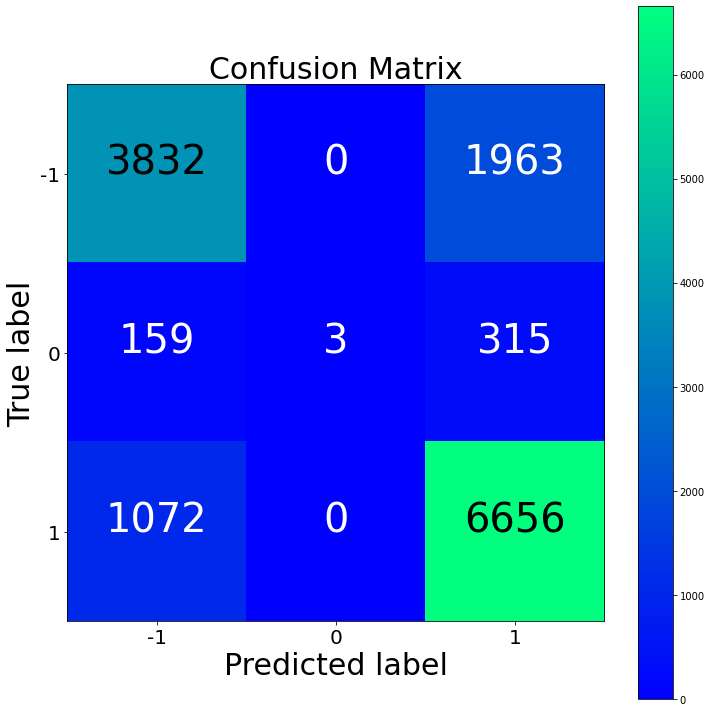

In [ ]:
cm = confusion_matrix(embedding["test"][1], y_predict)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['-1','0', '1'], normalize=False, title='Confusion Matrix')
plt.show()

In [ ]:
test_X=pd.read_csv('/content/drive/MyDrive/zindi/icompass/Test.csv')
test_corpus = test_X["text"]
test_Id = test_X["ID"]

In [ ]:
test_corpus = test_X["text"]
test_Id = test_X["ID"]

In [ ]:
test_corpus_tokens = test_corpus.apply(tokenizer.tokenize)

In [ ]:
test_corpus_tokens.head()

0    [barcha, aaindou, fiha, hak, w, barcha, teflim...
1                            [ye, gernabou, ye, 9a7ba]
2                [saber, w, barra, rabbi, m3ak, 5ouya]
3             [cha3ébbb, ta7aaaaannnnnnnnnnn, tfouuhh]
4    [rabi, y5alihoulek, w, yfar7ek, bih, w, inchal...
Name: text, dtype: object

In [ ]:
vectorized_text = dict()
vectorized_text['test']  = (count_vectorizer.transform(test_corpus))  # see options in the above cell

print ('DONE - [EMBEDDING] Apply Chosen Embeddings to the Tweets')

DONE - [EMBEDDING] Apply Chosen Embeddings to the Tweets


**TEST**

In [ ]:
embedding = vectorized_text                
classifier = sgd_classifier    # lr_classifier | lsvm_classifier | nb_classifier | dt_classifier
predicted_sentiment = classifier.predict(embedding['test']).tolist()


In [ ]:
results = pd.DataFrame(
    {'Id': test_Id,
     'label': predicted_sentiment
    })
results.to_csv('submission6.csv', index=False)

In [ ]:
results.head()

,Id,label
0,2DDHQW9,1
1,5HY6UEY,-1
2,ATNVUJX,1
3,Q9XYVOQ,1
4,TOAHLRH,1
